In [322]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
AUC_PATH = 'auc_scores'

In [323]:
%matplotlib inline


In [324]:
heuristic_test = pd.read_csv(f'{AUC_PATH}/auc_user_test_seq_40_heuristic_True.csv')
heuristic_val = pd.read_csv(f'{AUC_PATH}/auc_user_val_seq_40_heuristic_True.csv')


In [325]:
heuristic_test.drop(columns=['Unnamed: 0'], inplace=True)
heuristic_val.drop(columns=['Unnamed: 0'], inplace=True)

In [326]:
heuristic_test

,user_bin,acc,prec,rec,f1
0,25.0,0.004717,0.004717,1.0,0.009390
1,25.0,0.051471,0.051471,1.0,0.097902
2,25.0,0.044053,0.044053,1.0,0.084388
3,25.0,0.013605,0.013605,1.0,0.026846
4,25.0,0.031915,0.031915,1.0,0.061856
...,...,...,...,...,...
3253,1000000.0,0.817488,0.817488,1.0,0.899580
3254,100000.0,0.587336,0.587336,1.0,0.740027
3255,1000000.0,0.535183,0.535183,1.0,0.697224
3256,100000.0,0.084806,0.084806,1.0,0.156352


In [327]:
heuristic_val

,user_bin,acc,prec,rec,f1
0,25.0,0.052632,0.052632,1.0,0.100000
1,25.0,0.163025,0.163025,1.0,0.280347
2,25.0,0.037855,0.037855,1.0,0.072948
3,25.0,0.113924,0.113924,1.0,0.204545
4,25.0,0.018382,0.018382,1.0,0.036101
...,...,...,...,...,...
3253,1000000.0,0.561016,0.561016,1.0,0.718783
3254,100000.0,0.576636,0.576636,1.0,0.731476
3255,1000000.0,0.553295,0.553295,1.0,0.712415
3256,100000.0,0.283212,0.283212,1.0,0.441411


In [328]:
acc_test = heuristic_test.groupby(['user_bin'])['acc'].mean().reset_index().rename(columns={'acc': 'test_acc'})
acc_val = heuristic_val.groupby(['user_bin'])['acc'].mean().reset_index().rename(columns={'acc': 'val_acc'})

In [329]:
prec_test = heuristic_test.groupby(['user_bin'])['prec'].mean().reset_index().rename(columns={'prec': 'test_prec'})
prec_val = heuristic_val.groupby(['user_bin'])['prec'].mean().reset_index().rename(columns={'prec': 'val_prec'})

In [330]:
rec_test = heuristic_test.groupby(['user_bin'])['rec'].mean().reset_index().rename(columns={'rec': 'test_rec'})
rec_val = heuristic_val.groupby(['user_bin'])['rec'].mean().reset_index().rename(columns={'rec': 'val_rec'})

In [331]:
f1_test = heuristic_test.groupby(['user_bin'])['f1'].mean().reset_index().rename(columns={'f1': 'test_f1'})
f1_val = heuristic_val.groupby(['user_bin'])['f1'].mean().reset_index().rename(columns={'f1': 'val_f1'})

In [332]:
acc = pd.merge(acc_test, acc_val, on='user_bin')
prec = pd.merge(prec_test, prec_val, on='user_bin')
rec = pd.merge(rec_test, rec_val, on='user_bin')
f1 = pd.merge(f1_test, f1_val, on='user_bin')

<AxesSubplot: title={'center': 'Accuracy by User Bin'}, xlabel='user_bin'>

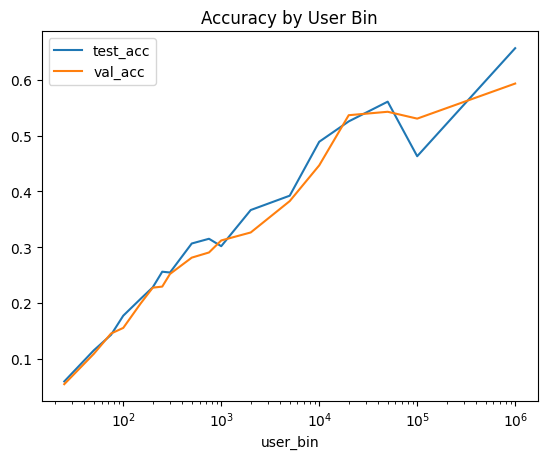

In [333]:
acc.plot(x='user_bin', y=['test_acc', 'val_acc'], kind='line', logx=True, title='Accuracy by User Bin')

<AxesSubplot: title={'center': 'Precision by User Bin'}, xlabel='user_bin'>

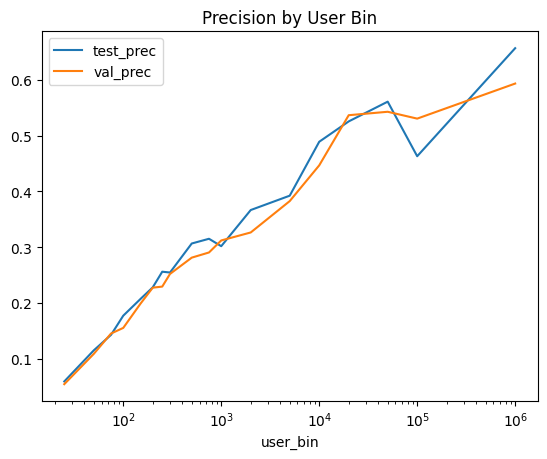

In [334]:
prec.plot(x='user_bin', y=['test_prec', 'val_prec'], kind='line', logx=True, title='Precision by User Bin')

array([<AxesSubplot: xlabel='user_bin'>, <AxesSubplot: xlabel='user_bin'>],
      dtype=object)

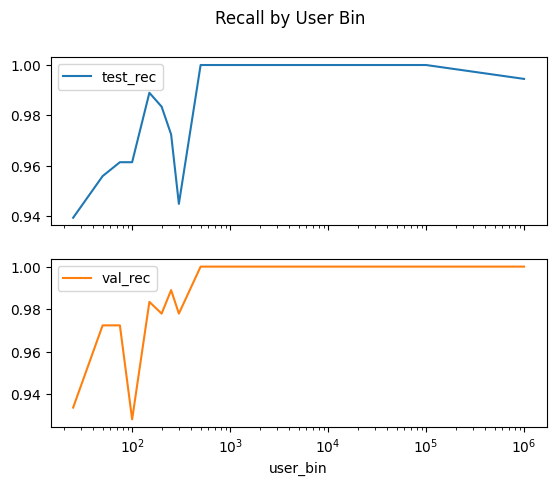

In [335]:
rec.plot(x='user_bin', y=['test_rec', 'val_rec'], kind='line', logx=True, subplots=True, title='Recall by User Bin')

<AxesSubplot: title={'center': 'F1 by User Bin'}, xlabel='user_bin'>

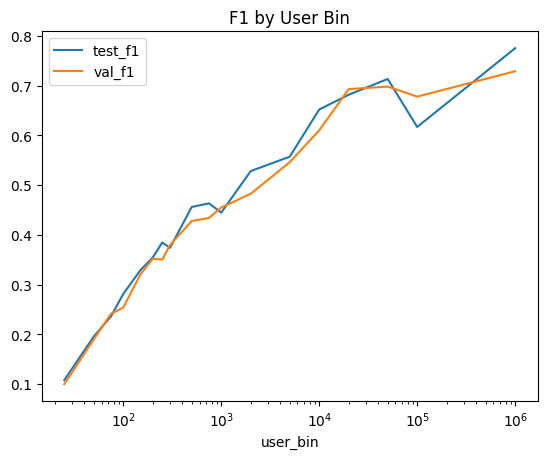

In [336]:
f1.plot(x='user_bin', y=['test_f1', 'val_f1'], kind='line', logx=True, title='F1 by User Bin')

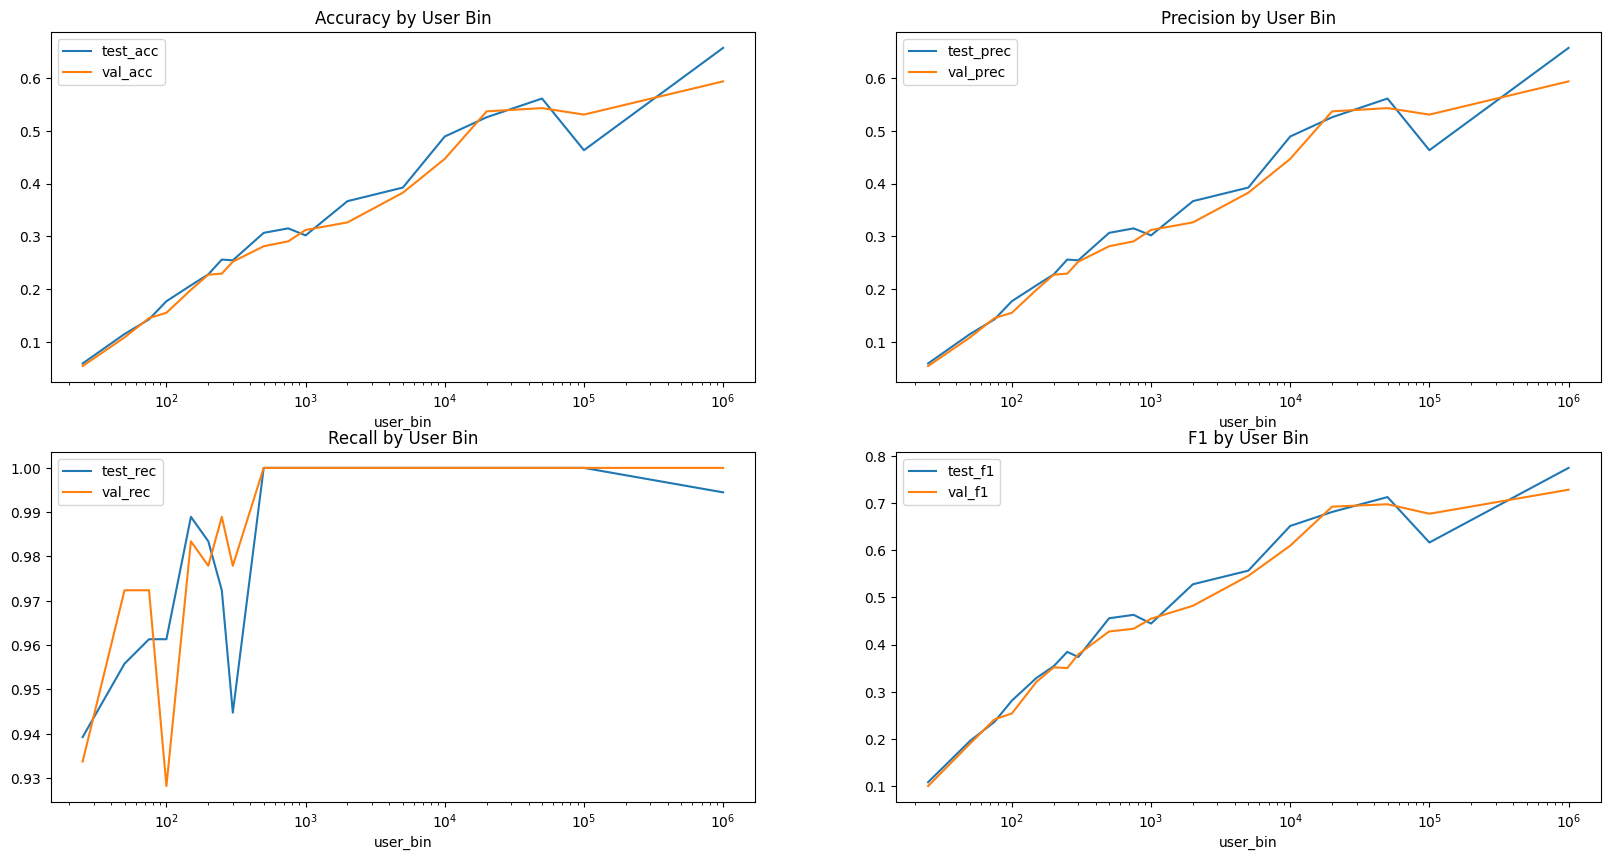

In [337]:
subplots, axes = plt.subplots(2, 2, figsize=(20, 10))
for df, plt, name in zip([acc, prec, rec, f1], axes.flatten(), ('Accuracy', 'Precision', 'Recall', 'F1')):
    df.plot(x='user_bin', kind='line', logx=True, ax=plt, title=f'{name} by User Bin')





